In [1]:
import pandas as pd
import os 
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [2]:
sample_stocks = pd.read_csv("screener-stocks.csv")

In [3]:
tickers = " ".join(list(sample_stocks['Symbol'].dropna()))

In [4]:
#yf_tickers = yf.Tickers(tickers)

In [5]:
data = yf.download(tickers, period="12mo")

[*********************100%%**********************]  5676 of 5676 completed


26 Failed downloads:
['CRD.B', 'MOG.B', 'HEI.A', 'CLBR', 'PBR.A', 'GTN.A', 'BH.A', 'BRK.A', 'BF.A', 'AKO.B', 'LGF.A', 'CRD.A', 'AKO.A', 'CWEN.A', 'IROH', 'AGM.A', 'MOG.A', 'AFJK', 'BRK.B', 'ANSC']: Exception('%ticker%: No data found, symbol may be delisted')
['LEN.B', 'GEF.B', 'LGF.B', 'UHAL.B', 'BF.B']: Exception("%ticker%: Period '12mo' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")
['AITR']: Exception("%ticker%: Period '12mo' is invalid, must be one of ['1d', '5d']")


In [6]:
data.to_csv("12_mo_test_data.csv")

In [7]:
adj_closing = data["Adj Close"]

C:\Users\ameet\Anaconda3\envs\causalstockanalysis\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ameet\Anaconda3\envs\causalstockanalysis\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Date'>

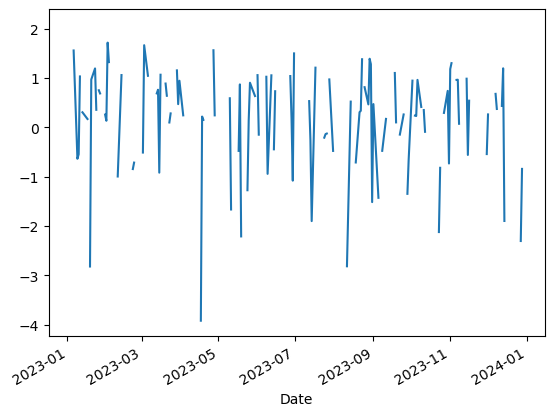

In [8]:
np.log(adj_closing['AAPL'].pct_change() * adj_closing['AAPL']).plot()

In [9]:
test_data = [0,1,2,3]

In [10]:
test_data = pd.Series(test_data)

In [11]:
test_data/test_data.shift()

0    NaN
1    inf
2    2.0
3    1.5
dtype: float64

In [14]:
log_returns = np.log(adj_closing/adj_closing.shift())

In [26]:
for ticker in list(sample_stocks['Symbol'].dropna()):
    try:
        adftest = adfuller(log_returns[ticker].dropna(), autolag='AIC', regression='ct')
        if adftest[1] > .05:
            print(ticker, adftest[1])
    except Exception as e: 
        continue
    #print("P-Value:", adftest[1])
    #print("Number of lags:", adftest[2])
    #print("Number of observations:", adftest[3])
    #print("Critical Values:", adftest[4])
    #print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

DRI 0.14171213971321228
BBY 0.1482426411918989
MNR 0.16810179682580778
WS 0.9905184704279326
CRGX 0.12450777528475027
ECO 0.9646302500619963
DEC 0.8043553728520225
MTAL 0.8706561775795708
SRDX 0.1518968781871743
ALCC 0.33434275748580866
PIII 0.05044380139609874
ABL 0.06070931861590174
RR 0.3168879837588964
ANL 0.3228602522443348
JWSM 0.161366568503289
IPSC 0.15202673599526684
PTHR 1.0
BLUE 0.16068817533904278
IOBT 0.06300675031390728
CREV 0.05859146965855844
MDBH 0.16184724558873953
SEZL 0.05433599756596278
MURA 0.4264452043098577
BNZI 0.7388030371262185
QETA 0.6646367190821618
ALCE 0.9963886478924041
NCAC 0.6489986341821165
AISP 1.0
QFTA 0.4290262570752989
FEBO 0.061915779413841444
NUBI 0.08037780100543346


C:\Users\ameet\Anaconda3\envs\causalstockanalysis\Lib\site-packages\statsmodels\regression\linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


LDTC 0.9951356723337773
ADEX 1.0
PODC 0.120116906822128
RCAC 0.652276814809613
ECDA 0.9777108294479468
MSAI 0.3562083265576569
ELAB 0.5284297910596358
MOBX 0.9666498388527859
ONMD 0.18344305606948935
RMCO 0.9621666292521155
HGAS 0.9745971699463636
NDRA 0.25252432442899064
SVMH 0.19292062320708858
OSA 0.1602926313487093
NXTP 0.8412740256509588
JNVR 0.4195580566347512
ZCMD 0.9864991354587364
SVRE 0.4026167808728154
AMBO 0.11303400099629296


In [25]:
adftest = adfuller(log_returns['BLUE'].dropna(), autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -2.9047374710159293
P-Value: 0.16068817533904278
Number of lags: 9
Number of observations: 239
Critical Values: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
